# Week 6
## K-nearest Neighbors Regressor


- kNN Not popular but a good baseline because no new features need to created.



- kNN regressor can handle oscillation and nonlinearity, so it is not mandatory to create new feature.



- This is a more powerful model compared to Linear Regression for interpolation but **fails for extrapolation**.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df1 = pd.read_excel('Lecture6_RegData_1.xlsx', sheet_name='1', index_col=0) # no. of subscriber to a youtube channel

In [5]:
df1.head()

,X,Y
0,0.000000,0.374540
1,0.121212,1.538001
2,0.242424,1.799133
3,0.363636,1.955545
4,0.484848,1.573701


Text(0, 0.5, 'Total Subscribers (K)')

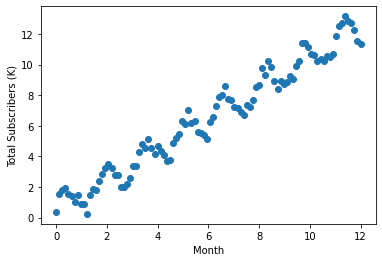

In [4]:
plt.plot(df1.X,df1.Y,'o') #one feature (explanatory variable) and one target variable (sale vs. seasaonality)
plt.xlabel('Month')
plt.ylabel('Total Subscribers (K)')
#data has overall linear trend and local periodic feature

In [6]:
df1[df1.X>10] # see results for nov and dec

,X,Y
83,10.060606,10.687387
84,10.181818,10.605989
85,10.303030,10.265278
86,10.424242,10.398448
87,10.545455,10.209273
88,10.666667,10.586258
89,10.787879,10.521635
90,10.909091,10.689610
91,11.030303,11.882016
92,11.151515,12.496394


Column X (feature) is Column with dimension of 1. scikit-learn's API requires the sample in the form of 2 dimensional array even tough it contains only 1 feature. First dimension is index and second dimension is feature X

In [7]:
# add dimensions to 1d arrays

print('Before: ', df1.X.shape) # 1d array
x1 = df1.X[:, np.newaxis] 
print('After: ', x1.shape)  # 2d array

#print('Before: ', df1.Y.shape)
y1 = df1.Y[:, np.newaxis]   
#print('After: ', y1.shape)

Before:  (100,)
After:  (100, 1)


<ipython-input-7-618b2b1d7707>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x1 = df1.X[:, np.newaxis]
<ipython-input-7-618b2b1d7707>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1 = df1.Y[:, np.newaxis]


In [ ]:
x2 = df1.X.values
x2.shape
x3 = x2.reshape(-1,1)
x3.shape

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=42)

# or use this
# x_train, x_test, y_train, y_test = train_test_split(df1.X, df1.Y, test_size=0.25, random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=5)
kneighbor_regression.fit(x_train, y_train) ## nothing happens here

KNeighborsRegressor()

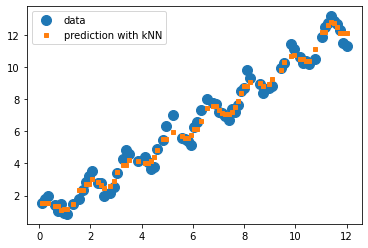

In [11]:
y_pred_train = kneighbor_regression.predict(x_train)

plt.plot(x_train[:,0], y_train, 'o', label="data", markersize=10)
plt.plot(x_train[:,0], y_pred_train, 's', label="prediction with kNN", markersize=4)
plt.legend(loc='best');

On the training set, we do a perfect job: each point is its own nearest neighbor! 

**Is it a good idea to have k=1?** 

In [12]:
kneighbor_regression.score(x_train, y_train)

0.988230909598614

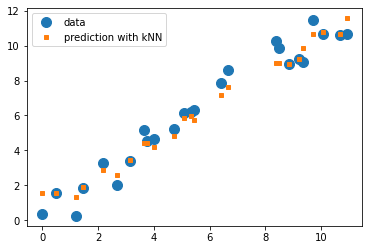

In [13]:
y_pred_test = kneighbor_regression.predict(x_test)

plt.plot(x_test[:,0], y_test, 'o', label="data", markersize=10)
plt.plot(x_test[:,0], y_pred_test, 's', label="prediction with kNN", markersize=4)
plt.legend(loc='best');

# this predicts y value of closest point in training dataset

In [15]:
kneighbor_regression.score(x_test, y_test)

0.9670982411117404

**Lecture Execise** Study the effect of variation in nearest neighbors from 1 to 2,3,4,5,& 6. Study the effect of using kNN reg. on data with the newly constructed seasonality feature.

### Effect of k - number of neighbors

###### As k in kNN increases, the model simplifies and underfits the training dataset. the model becomes less sensitive to the noise in the training or the testing dataset. 

###### As k in kNN decreases to 1, the model becomes complex and overfits the training dataset. 

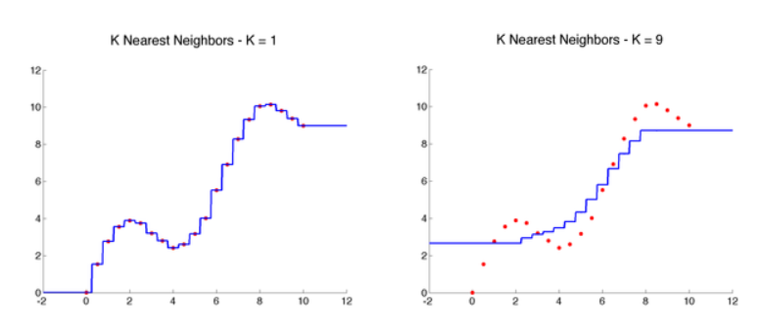

----------- 
# Ways for enhancing the “Accuracy” of a Machine Learning Model


>  Add more data


> Treat missing and Outlier values


> Feature Engineering : These features may have a higher ability to explain the variance in the training data.

      - Feature creation
      
      - Feature transformation -  scaling; modify the distribution (log, square root, inverse)


> Feature selection


> Tune the model - Hyperparameters


> Cross-validation



> Try several models


> Ensemble -- bagging and boosting





https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/

In [26]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=1)
kneighbor_regression.fit(x_train, y_train) ## nothing happens here

KNeighborsRegressor(n_neighbors=1)

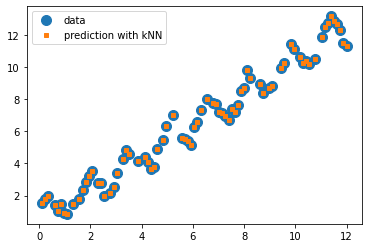

In [27]:
y_pred_train = kneighbor_regression.predict(x_train)

plt.plot(x_train[:,0], y_train, 'o', label="data", markersize=10)
plt.plot(x_train[:,0], y_pred_train, 's', label="prediction with kNN", markersize=4)
plt.legend(loc='best');

On the training set, we do a perfect job: each point is its own nearest neighbor! 

**Is it a good idea to have k=1?** 

In [28]:
kneighbor_regression.score(x_train, y_train)

1.0

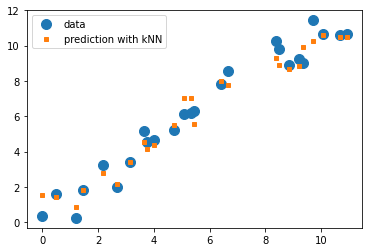

In [29]:
y_pred_test = kneighbor_regression.predict(x_test)

plt.plot(x_test[:,0], y_test, 'o', label="data", markersize=10)
plt.plot(x_test[:,0], y_pred_test, 's', label="prediction with kNN", markersize=4)
plt.legend(loc='best');

# this predicts y value of closest point in training dataset

In [30]:
kneighbor_regression.score(x_test, y_test)

0.9685622742464963

In [31]:
from sklearn.neighbors import KNeighborsRegressor
kneighbor_regression = KNeighborsRegressor(n_neighbors=10)
kneighbor_regression.fit(x_train, y_train) ## nothing happens here

KNeighborsRegressor(n_neighbors=10)

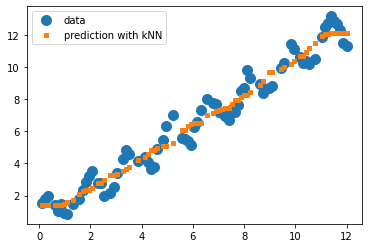

In [32]:
y_pred_train = kneighbor_regression.predict(x_train)

plt.plot(x_train[:,0], y_train, 'o', label="data", markersize=10)
plt.plot(x_train[:,0], y_pred_train, 's', label="prediction with kNN", markersize=4)
plt.legend(loc='best');

On the training set, we do a perfect job: each point is its own nearest neighbor! 

**Is it a good idea to have k=1?** 

In [33]:
kneighbor_regression.score(x_train, y_train)

0.961420622599741

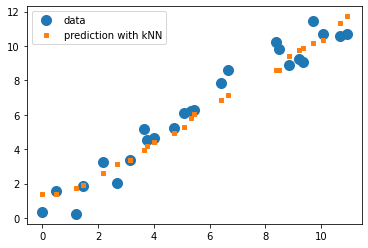

In [34]:
y_pred_test = kneighbor_regression.predict(x_test)

plt.plot(x_test[:,0], y_test, 'o', label="data", markersize=10)
plt.plot(x_test[:,0], y_pred_test, 's', label="prediction with kNN", markersize=4)
plt.legend(loc='best');

# this predicts y value of closest point in training dataset

In [35]:
kneighbor_regression.score(x_test, y_test)

0.9353365284890044